In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

# Secant Method

For functions that are smooth near a root, the method known as the [secant method](https://en.wikipedia.org/wiki/Secant_method) generally converges faster than the bisection method.
In this method, the function is assumed to be approximately linear in the local region of interest,
and the next improvement in the root is taken as the point where the approximating line crosses the axis.
After each iteration, the oldest boundary point is discarded in favor of the latest estimate of the root.

The secant method converges more rapidly near a root of a sufficiently continuous function.
However, it has the disadvantage that the root does not necessarily remain bracketed.

## Secant Line Formula

<center><figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Secant_method.svg/300px-Secant_method.svg.png">
  <figcaption>From Wikipedia (https://en.wikipedia.org/wiki/Secant_method)</figcaption>
</figure></center>

Consider a continuous, smooth function $f(x)$ that passes through the axis in some local region.
Given the interval $[x_0, x_1]$, we can construct a line through the points $(x_0, f(x_0))$ and $(x_1, f(x_1))$ as shown in the figure above.
The equation of this line called the *secant line* is

$$
y = \frac{f(x_1) - f(x_0)}{x_1 - x_0} (x - x_1) + f(x_1)
$$

The secant line crosses the axis when $y = 0$ whose solution is

$$
x = x_1 - f(x_1) \frac{x_1 - x_0}{f(x_1) - f(x_0)}
$$

## Algorithm

1. Starting with initial values $x_0$ and $x_1$, find the point where the secant line crosses the axis:

    $$
    x = x_1 - f(x_1) \frac{x_1 - x_0}{f(x_1) - f(x_0)}
    $$
    
2. We then use this new value of $x$ as $x_2$ and repeate the process, using $x_1$ and $x_2$ instead of $x_0$ and $x_1$, solving for $x_3$, $x_4$, etc.:

    $$
    \begin{aligned}
    x_3 &= x_2 - f(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)}, \\
    x_4 &= x_3 - f(x_3) \frac{x_3 - x_2}{f(x_3) - f(x_2)}, \\
    &\ \vdots \\
    x_n &= x_{n - 1} - f(x_{n - 1}) \frac{x_{n - 1} - x_{n - 2}}{f(x_{n - 1}) - f(x_{n - 2})}. \\
    \end{aligned}
    $$
    
3. The iteration stops when we reach a sufficiently high level of precision (a sufficiently small difference between $x_n$ and $x_{n - 1}$).

## Implementation

Write a function called `secant_by` which takes four input parameters `f`, `a`, `b`, and `n` and returns the approximation of a solution of $f(x) = 0$ given by `n` iterations of the secant method.

In [1]:
def secant_by(f, a, b, n):
    """Return the root calculated using the secant method.

    :param f:
        A function to solve.
    :param a:
        First initial location.
    :param b:
        Second initial location.
    :param n:
        The number of iterations
    """

    x0, x1 = a, b
    f0, f1 = f(x0), f(x1)
    iterations = n
    x2 = None
    
    for i in range(iterations):
        x2 = x1 - f1 * (x1 - x0) / float(f1 - f0)
        x0, x1 = x1, x2
        f0, f1 = f1, f(x1)
        
    return x2

Like before, also write a function called `secant_while` which takes a `predicate` instead of the number of iterations:

In [2]:
def secant_while(f, xinit, predicate):
    """Return the root calculated using the secant method.

    :param f:
        A function to solve.
    :param xinit:
        A pair of initial values for x.
    :param predicate:
        A callable that takes three arguments
            - i : the iteration count
            - xy : a pair of the midpoint and the function value in the current iteration
            - dx : the change of the x value
        and returns boolean:
            - If True, the search continues.
            - If False, the search terminates.
    """

    x0, x1 = map(float, xinit)
    f0, f1 = f(x0), f(x1)
    i, x2, f2 = 0, float("nan"), float("nan")
    
    def secant_root():
        nonlocal i, x2, f2
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        f2 = f(x2)
        i += 1
        return i, (x2, f2), x2 - x1

    while predicate(*secant_root()):
        x0, x1 = x1, x2
        f0, f1 = f1, f2
        
    return x2

## Exercises

### CubeRoot

Approximate $\sqrt[3]{2}$ by solving

$$
x^3 - 2 = 0
$$

In [3]:
cuberoot2_approx = secant_while(lambda x: x*x*x - 2, (1, 2),
                                lambda i, xy, dx: abs(dx) > 1e-10)
(cuberoot2_approx, abs(2**(1/3) - cuberoot2_approx))

(1.2599210498948732, 0.0)

### Supergolden Ratio

Let's find an approximation of the [supergolden ratio](https://en.wikipedia.org/wiki/Supergolden_ratio),
which is the only real root of the polynomial

$$
f(x) = x^3 - x^2 - 1
$$

The exact value of the supergolden ratio is given by

$$
\psi = \frac{1 + \sqrt[3]{\frac{29 + 3\sqrt{93}}{2}} + \sqrt[3]{\frac{29 - 3\sqrt{93}}{2}}}{3}
\approx 1.4655712318767682
$$

Let's plot the polynomial first:

In [ ]:
x = np.linspace(0, 2.5, 200)
y = x**3 - x**2 - 1

plt.figure()
plt.plot(x, y, '-r', 1.4655712318767682, 0, "ok")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

We can find that the solution is within $[1, 2]$.

In [ ]:
approx_psi = secant_by(lambda x: x ** 3 - x ** 2 - 1, 1, 2, 7)
approx_psi

Compare our approximation with the exact solution:

In [ ]:
supergolden = (1 + ((29 + 3 * 93 ** 0.5) / 2) ** (1 / 3) + ((29 - 3 * 93 ** 0.5) / 2) ** (1 / 3)) / 3
abs_err = abs(supergolden - approx_psi)
abs_err

The approximation converges to the solution with an accuracy of $10^{-10}$ just under 7 iterations.
Check how many iterations the bisection method would need to achieve the same level of accuracy.

Let's use `secant_while` to see how fast the approximation converges.

In [4]:
result_tuples = []

def predicate(i, xy, dx):
    result_tuples.append([i, *xy, dx])
    print("i = {:1d}, x = {:.12f}, y = {:+.12e}, dx = {:+.12e}"
          .format(i, *xy, dx))
    return abs(xy[1]) > 1e-10

secant_while(lambda x: x ** 3 - x ** 2 - 1, (1, 2), predicate)

i = 1, x = 1.250000000000, y = -6.093750000000e-01, dx = -7.500000000000e-01
i = 2, x = 1.376623376623, y = -2.862640816765e-01, dx = +1.266233766234e-01
i = 3, x = 1.488806910426, y = +8.346301015951e-02, dx = +1.121835338030e-01
i = 4, x = 1.463482351777, y = -7.322493320465e-03, dx = -2.532455864955e-02
i = 5, x = 1.465524956647, y = -1.625369994076e-04, dx = +2.042604870237e-03
i = 6, x = 1.465571325487, y = +3.288100440813e-07, dx = +4.636883965436e-05
i = 7, x = 1.465571231873, y = -1.471445187917e-11, dx = -9.361412489639e-08


1.4655712318725789

In [9]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.semilogy(
    [    ixydx[0]  for ixydx in result_tuples], 
    [abs(ixydx[2]) for ixydx in result_tuples], 
    "o:k")
plt.grid()
plt.xlabel("iterations")
plt.title("$|f(x_n)|$")

plt.subplot(1, 2, 2)“
plt.semilogy(
    [    ixydx[0]  for ixydx in result_tuples], 
    [abs(ixydx[3]) for ixydx in result_tuples], 
    "o:k")
plt.grid()
plt.xlabel("iterations")
plt.title("$|\Delta x_n|$")

plt.tight_layout()
plt.show()

SyntaxError: invalid character '“' (U+201C) (3321686658.py, line 12)

Finally, the solution needs not be bracketed by the initial interval.
For example, we could have supplied $[2, 2.5]$ as the initial interval:

In [ ]:
secant_while(lambda x: x ** 3 - x ** 2 - 1, (2, 2.5),
             lambda i, xy, dx: abs(xy[1]) >= 1e-10)

### Whistler Dispersion Relation

[Waves in plasmas](https://en.wikipedia.org/wiki/Waves_in_plasmas) are an interconnected set of particles and fields which propagate in a periodically repeating fashion.
The frequency $\omega$ and wave number $k$ of a plasma wave mode satisfy a certain relationship called the *dispersion relation*.

The dispersion relation of the parallel-propagating whistler mode is given by

$$
c^2 k^2 = \omega^2 - \frac{\omega_p^2}{1 - \omega_c/\omega}
$$

where $c$ is the speed of light, $\omega_p$ is the [electron plasma frequency](https://en.wikipedia.org/wiki/Plasma_parameters), and $\omega_c$ is the [electron gyrofrequency](https://en.wikipedia.org/wiki/Plasma_parameters).

It is easy to find the wave number $k$ as a function of the frequency $\omega$:

$$
k(\omega) = \pm \frac{1}{c} \sqrt{\omega^2 - \frac{\omega_p^2}{1 - \omega_c/\omega}}
$$

Let's assume

- $c = 5$
- $\omega_p = 5$
- $\omega_c = 1$

and find how $k$ and $\omega$ is related:

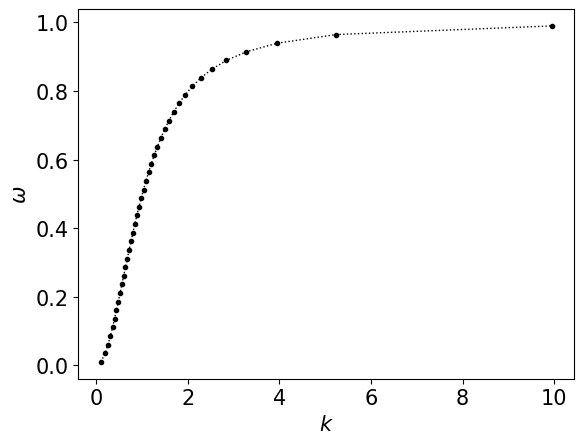

In [8]:
w = np.linspace(0.01, 0.99, 40)
k = 1/5 * np.sqrt(w**2 - 5**2/(1 - 1/w))

plt.figure()
plt.plot(k, w, ".:k", linewidth=1)
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.show()

Sometimes it is desirable to have $\omega$ at given $k$ values (i.e., $\omega(k)$),
but as you can see, it is not easy to find $\omega$ as a function of $k$.
We can use a root finding algorithm to get $\omega$ at desired $k$ values.

Let's define

$$
f_k(\omega) = 
c^2 k^2 - \omega^2 + \frac{\omega_p^2}{1 - \omega_c/\omega}
$$

For a given $k$, the frequency $\omega$ must satisfy $f_k(\omega) = 0$.
We will use the secant method to find solutions $\omega$ for a range of $k$ values.

In [1]:
# define f_k(w)
def dispersion_relation(k, w):
    c, wp, wc = 5, 5, 1
    return c**2 * k**2 - w**2 + wp**2/(1 - wc/w)

# define a function that solves the relation for a given k
def single_step(k, winit):
    max_w = max(winit, key=abs)
    return secant_while(lambda w: dispersion_relation(k, w), winit,
                        lambda i, xy, dw: abs(dw) > abs(1e-7 * max_w))

# define the k space
ks = np.linspace(0.01, 10, 40)

# first two guesses of omega
ws = [ks[0], ks[1]]

# walk over k values and find solutions
for k in ks:
    ws.append(single_step(k, ws[-2:]))

# remove the first two guesses
ws = ws[2:]

w_exact = np.linspace(1e-10, 0.99, 400)
k_exact = 1/5 * np.sqrt(w_exact**2 - 5**2/(1 - 1/w_exact))

plt.figure()
plt.plot(k_exact, w_exact, "-k", label="$\\omega$ exact")
plt.plot(ks, ws, ".:r", linewidth=1, label="$\\omega$ approx")
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.legend()
plt.show()

NameError: name 'np' is not defined

In [27]:
2**(-19) > 1e-6

2.384185791015625e-07

In [28]:
1e-6

1e-06